In [1]:
import numpy as np
import pandas as pd
import cmath

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

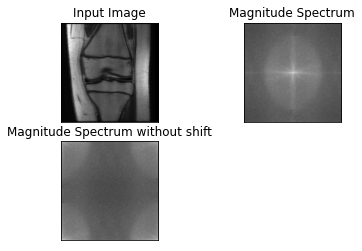

In [2]:
img = cv.imread('knee_image.png',0)
F = np.fft.fft2(img)

fshift = np.fft.fftshift(F)
magnitude_spectrum = 20*np.log(np.abs(fshift))

magnitude_spectrum_without_shift = 20*np.log(np.abs(F))

plt.subplot(221),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(magnitude_spectrum_without_shift, cmap = 'gray')
plt.title('Magnitude Spectrum without shift'), plt.xticks([]), plt.yticks([])

plt.show()


In [3]:
F.shape

(448, 441)

In [4]:
def calculate_cell_value(T=1, a= 0.1, b=0.1, u=None, v= None):
    p = ((u+1)*a)+((v+1)*b)
    z= 3.14 * p
    sin_z = np.sin((z * np.pi)/180)
    magnitude =( T/z) * sin_z
    phase = -z
    return cmath.rect(magnitude, phase)

In [5]:
def calculate_matrix_h(nrow = 448,ncol=441,T=1,a=0.1,b=0.1,u=None,v=None):
    H = [ [ 0 for i in range(ncol) ] for j in range(nrow)]
    for i in range(448):
        for j in range(441):
            H[i][j] = calculate_H(T,a,b,i,j)
    return H

In [6]:
H = [ [ 0 for i in range(441) ] for j in range(448) ]
for i in range(448):
    for j in range(441):
        H[i][j] = calculate_cell_value(1,0.1,0.1,i,j)

In [7]:
G = F*H

(Text(0.5, 1.0, 'Magnitude Spectrum of original image'), ([], []), ([], []))

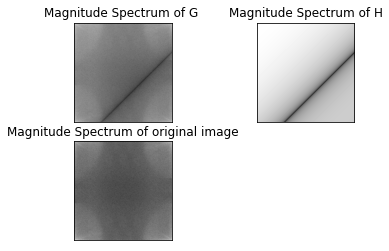

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

magnitude_spectrum_g = 20*np.log(np.abs(G))
magnitude_spectrum_f = 20*np.log(np.abs(F))
magnitude_spectrum_h = 20*np.log(np.abs(H))


plt.subplot(221),plt.imshow(magnitude_spectrum_g, cmap = 'gray')
plt.title('Magnitude Spectrum of G '), plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(magnitude_spectrum_h, cmap = 'gray')
plt.title('Magnitude Spectrum of H'), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(magnitude_spectrum_f, cmap = 'gray')
plt.title('Magnitude Spectrum of original image'), plt.xticks([]), plt.yticks([])

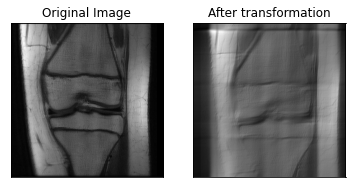

In [9]:
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# shift FFT to the center
fft_img_shift = np.fft.fftshift(G)

#reverse the shift
fft_img_mod = np.fft.ifftshift(fft_img_shift)

# # reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img_mod)

img_mod = np.abs(img_mod)

#show differences
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_mod, cmap='gray')
plt.title('After transformation'), plt.xticks([]), plt.yticks([])

plt.show()



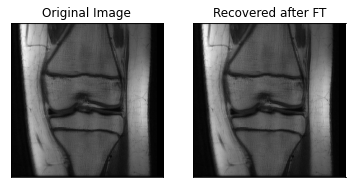

In [10]:
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('knee_image.png',0)

# 2D fourier transform
fft_img = np.fft.fft2(img)

# shifting FFT to the center
fft_img_shift = np.fft.fftshift(fft_img)

# reverse shift
fft_img_mod = np.fft.ifftshift(fft_img_shift)

# reverse the 2D fourier transform
img_mod = np.fft.ifft2(fft_img)


img_mod = np.abs(img_mod)

# show differences
plt.subplot(121),plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])


plt.subplot(122),plt.imshow(img_mod, cmap='gray')
plt.title('Recovered after FT'), plt.xticks([]), plt.yticks([])

plt.show()
